<a href="https://colab.research.google.com/github/Ali-Alameer/Deep-Learning/blob/main/week3_feedforward_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this code, we use the load_digits function from scikit-learn to load the digits dataset. Then, we split the data into training and test sets using train_test_split.

We preprocess the data by dividing the pixel values by 16 to normalize them in the range of [0, 1]. We also convert the target labels to categorical format using to_categorical from Keras.

Next, we create a simple feedforward neural network using Keras' Sequential model. The model consists of three dense layers with ReLU activation in the hidden layers and softmax activation in the output layer.

We compile the model with the Adam optimizer, categorical cross-entropy loss function, and accuracy as the evaluation metric.

Then, we train the model on the training data for 10 epochs with a batch size of 32. We also validate the model's performance on the test data during training.

After training, we evaluate the model on the test data and print the test loss and accuracy.

This code provides a basic example of how to implement a deep learning model using Keras for the digit dataset. You can experiment with different network architectures, hyperparameters, and evaluation metrics to further improve the model's performance.

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score, accuracy_score

# Load the digits dataset
digits = load_digits()

# Split the data into training, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Preprocess the data
X_train = X_train / 16.0  # Normalize the pixel values to the range [0, 1]
X_val = X_val / 16.0
X_test = X_test / 16.0

# Convert the target labels to categorical format
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

# Create a simple feedforward neural network
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(64,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=1)

Epoch 1/10
34/34 [==============================] - 0s 3ms/step - loss: 2.1329 - accuracy: 0.2507 - val_loss: 1.9416 - val_accuracy: 0.4306
Epoch 2/10
34/34 [==============================] - 0s 1ms/step - loss: 1.6857 - accuracy: 0.6212 - val_loss: 1.4416 - val_accuracy: 0.7000
Epoch 3/10
34/34 [==============================] - 0s 1ms/step - loss: 1.1472 - accuracy: 0.7985 - val_loss: 0.9506 - val_accuracy: 0.7889
Epoch 4/10
34/34 [==============================] - 0s 1ms/step - loss: 0.7463 - accuracy: 0.8644 - val_loss: 0.6360 - val_accuracy: 0.8639
Epoch 5/10
34/34 [==============================] - 0s 1ms/step - loss: 0.5102 - accuracy: 0.8942 - val_loss: 0.4794 - val_accuracy: 0.9083
Epoch 6/10
34/34 [==============================] - 0s 1ms/step - loss: 0.3951 - accuracy: 0.9192 - val_loss: 0.3936 - val_accuracy: 0.9111
Epoch 7/10
34/34 [==============================] - 0s 1ms/step - loss: 0.3162 - accuracy: 0.9294 - val_loss: 0.3255 - val_accuracy: 0.9222
Epoch 8/10
34/34 [==

In [8]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_labels = y_pred.argmax(axis=1)
y_test_labels = y_test.argmax(axis=1)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test_labels, y_pred_labels)
print("Confusion Matrix:")
print(confusion_mat)

# Calculate F1 score
f1 = f1_score(y_test_labels, y_pred_labels, average='weighted')
print("F1 Score:", f1)

# Calculate recall
recall = recall_score(y_test_labels, y_pred_labels, average='weighted')
print("Recall:", recall)

# Calculate precision
precision = precision_score(y_test_labels, y_pred_labels, average='weighted')
print("Precision:", precision)

# Compute accuracy
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print("Accuracy:", accuracy)

12/12 [==============================] - 0s 774us/step
Confusion Matrix:
[[32  0  0  0  1  0  0  0  0  0]
 [ 0 25  0  0  0  0  0  0  1  2]
 [ 0  1 32  0  0  0  0  0  0  0]
 [ 0  0  1 31  0  1  0  0  1  0]
 [ 0  1  0  0 45  0  0  0  0  0]
 [ 0  0  0  0  0 42  1  0  0  4]
 [ 1  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  1  0  0  0  1  0  0 28  0]
 [ 0  0  0  0  0  1  0  1  1 37]]
F1 Score: 0.9420080320935631
Recall: 0.9416666666666667
Precision: 0.9433327902682742
Accuracy: 0.9416666666666667


In [77]:
from PIL import Image

import numpy as np

img_path = 'test4.webp'  

img = Image.open(img_path)

img = img.resize((8, 8))

img_gray = img.convert('L')

img_array = np.array(img_gray)

img_array = img_array.reshape((1, 64))

img_array = img_array / 16.0

predictions = model.predict(img_array)

predicted_digit = np.argmax(predictions)


print(f"Predicted digit: {predicted_digit}")

1/1 [==============================] - 0s 29ms/step
Predicted digit: 7


In [65]:
predictions = model.predict(img_array)
predictions

1/1 [==============================] - 0s 13ms/step


array([[0.0000000e+00, 0.0000000e+00, 1.1763984e-13, 2.4054184e-15,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [55]:
chimmy = Image.open(img_path)

daniel = chimmy.resize((8, 8))
daniel

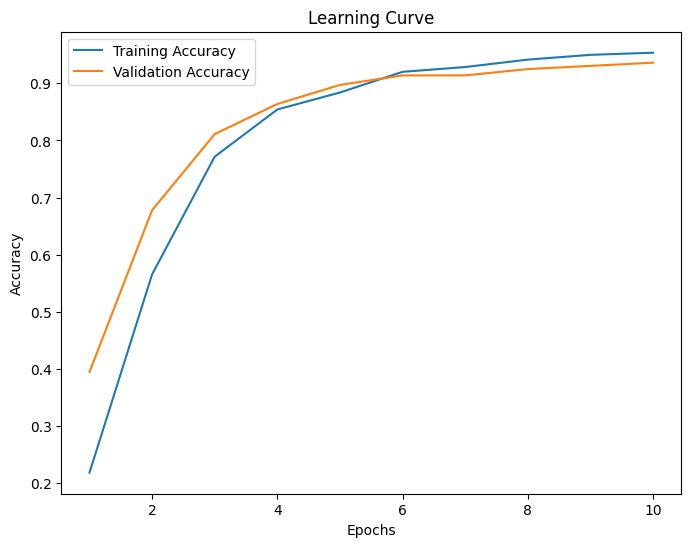

In [9]:
# Plot the learning curvehat it could not shape a 1000
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(history.history['accuracy']) + 1), history.history['accuracy'], label='Training Accuracy')
plt.plot(np.arange(1, len(history.history['accuracy']) + 1), history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Let's have a look at our input dataset

Number of training samples: 1077
Image size: 8 x 8
Image shape: (8, 8)


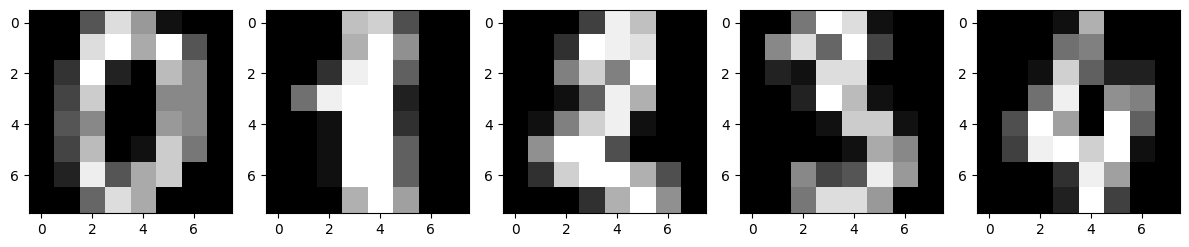

In [10]:
import matplotlib.pyplot as plt


# Get the number of samples and image dimensions
num_samples, img_height, img_width = X_train.shape[0], digits.images[0].shape[0], digits.images[0].shape[1]

# Visualize the first few training images
num_images_to_visualize = 5
fig, axes = plt.subplots(1, num_images_to_visualize, figsize=(12, 4))

for i in range(num_images_to_visualize):
    axes[i].imshow(digits.images[i], cmap='gray')

# Display image size and shape information
print("Number of training samples:", num_samples)
print("Image size: {} x {}".format(img_height, img_width))
print("Image shape:", digits.images[0].shape)

plt.tight_layout()
plt.show()


# Visualize the label distribution

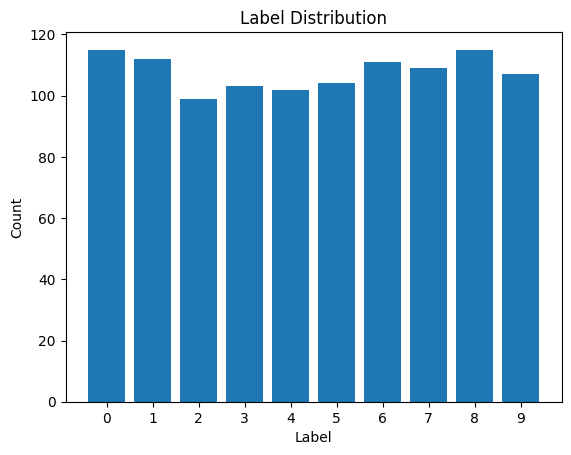

In [11]:
label_counts = np.sum(y_train, axis=0)

# Visualize the label distribution
labels = range(10)
plt.bar(labels, label_counts)
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Label Distribution")
plt.xticks(labels)
plt.show()